<a href="https://colab.research.google.com/github/JiaminJIAN/20MA573/blob/master/src/Bsm%20price%20change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Question:**

Consider an european option with
- call type
- strike = 110
- maturity = T
underlying a Gbm stock with
- initial: 100
- interest rate: 4.75%
- vol ratio: $\sigma$

We denote this bsm price by $f(\sigma, T)$.

(1) Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

(2) Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

(3) Describe your observations. Do you think the same behavior is also true for put?

(4) Could you prove your observations?

##**Analysis**

As we know, the call and put price with maturity $T$ and $K$ will be known as $C_t$ and $P_t$ can given as below:
$$C_t = \mathbb{E}^{\mathbb{Q}} [e^{-r(T-t)} (S(T) - K)^+ ｜\mathcal{F}_{t}] = S_t  \mathcal{N}(d_1) - K e^{-r(T-t)} \mathcal{N}(d_2),$$
and 
$$P_t = \mathbb{E}^{\mathbb{Q}} [e^{-r(T-t)} (S(T) - K)^- ｜\mathcal{F}_{t}] = K e^{-r(T-t)} \mathcal{N}(- d_2) - S_t  \mathcal{N}(- d_1),$$
where $d_{i}$ can be given by the following formulars:

$$d_{1} = \frac{ln(\frac{S_{t}}{K}) + (r + \frac{1}{2}\sigma^{2})(T-t)}{\sqrt{\sigma^{2}(T-t)}}$$

and 

$$d_{2} = \frac{ln(\frac{S_{t}}{K}) + (r - \frac{1}{2}\sigma^{2})(T-t)}{\sqrt{\sigma^{2}(T-t)}} = d_{1} - \sigma \sqrt{T-t}.$$

We can write the value of the European call option as the function:$C_{t}(T, K, S_{t}, r, \sigma)$. Since we know $K = 110, t = 0, S_t = 100$ and $r = 0.0475$, then we can rewrite the value of the call option as $f(\sigma, T) = C_{t}(T, 110, 100, 0.0475, \sigma)$. We can calculate the $\frac{\partial f(\sigma, T)}{\partial T}$ and $\frac{\partial f(\sigma, T)}{\partial \sigma}$ to describe the relationship between the change of $T$ or $\sigma$ and the value of the European call optiuon.

##**Answer:**

(1) Let $\sigma = 20\%$ fixed. plot $T \mapsto f(0.2, T)$ when $T$ is ranging over $(0.5, 2)$.

We can use the code given in the course. we reload the european option class created before and do some little adjustment.

In [0]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline


'''=========
option class init
=========='''
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 110.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      return max([0, (s - k)*otype])


'''============
Gbm class inherited from sde_1d
============='''

class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2,
                 maturity = 1
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio
        self.maturity = maturity

In [0]:
'''========
Black-Scholes-Merton formula. 
=========='''
def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    maturity = self.maturity
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))


Gbm.bsm_price = bsm_price

In [0]:
gbm1 = Gbm()
option1 = VanillaOption()

maturity_list = []
option_price_list = []

for i in range(16):
  maturity = .5+i * 0.1
  maturity_list.append(maturity)
  gbm1.maturity=maturity
  option_price = gbm1.bsm_price(option1)
  option_price_list.append(option_price)

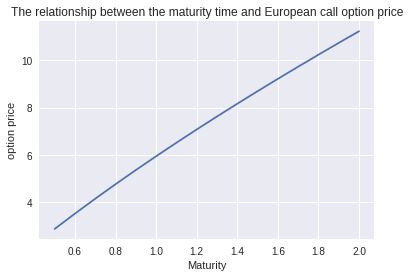

In [4]:
plt.plot(maturity_list, option_price_list)

#decorations
plt.xlabel('Maturity')
plt.ylabel('option price')
plt.title('The relationship between the maturity time and European call option price');
plt.show()

(2) Let $T = 1$ fixed. plot $\sigma \mapsto f(\sigma, 1)$ when $\sigma$ is ranging over $(.05, 0.5)$

In [0]:
gbm2 = Gbm()
option2 = VanillaOption()

sigma_list = []
option_price_list = []

for i in range(23):
  sigma = 0.05 + i * 0.02 
  sigma_list.append(sigma)
  gbm2.vol_ratio=sigma
  option_price = gbm2.bsm_price(option2)
  option_price_list.append(option_price)

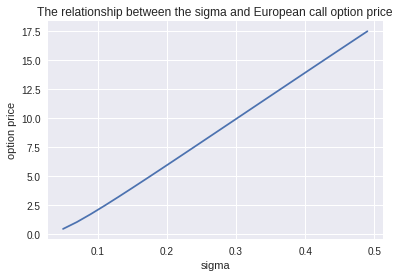

In [6]:
plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option price')
plt.title('The relationship between the sigma and European call option price');
plt.show()

(3) Describe your observations. Do you think the same behavior is also true for put?

Answer:

We can see that as the increase of sigma and maturity, the call option's price will be higher. And so as the put option, we can also give the diagram descript the relationship between the change of $T$ or $\sigma$ and the value of the European call optiuon.

For the maturity time T:

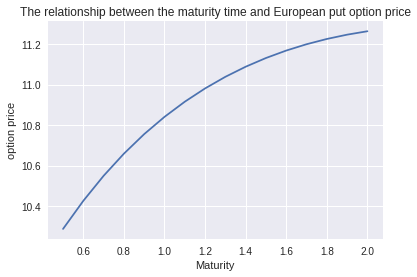

In [7]:
gbm3 = Gbm()
option3 = VanillaOption(otype=-1)

maturity_list = []
option_price_list = []

for i in range(16):
  maturity = .5+i * 0.1
  maturity_list.append(maturity)
  gbm3.maturity=maturity
  option_price = gbm3.bsm_price(option3)
  option_price_list.append(option_price)

plt.plot(maturity_list, option_price_list)

#decorations
plt.xlabel('Maturity')
plt.ylabel('option price')
plt.title('The relationship between the maturity time and European put option price');
plt.show()

And for the volatility $\sigma$:

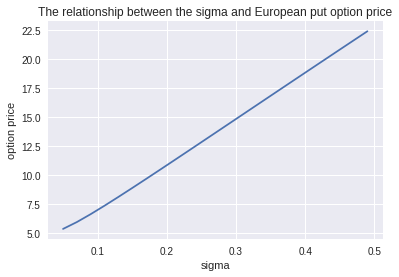

In [8]:
gbm4 = Gbm()
option4 = VanillaOption(otype=-1)

sigma_list = []
option_price_list = []

for i in range(23):
  sigma = 0.05 + i * 0.02 
  sigma_list.append(sigma)
  gbm4.vol_ratio=sigma
  option_price = gbm4.bsm_price(option4)
  option_price_list.append(option_price)

plt.plot(sigma_list, option_price_list)

#decorations
plt.xlabel('sigma')
plt.ylabel('option price')
plt.title('The relationship between the sigma and European put option price');
plt.show()

(4) Could you prove your observations?

**Proof:**

First, for the volatility $\sigma$, we need to calculate $\frac{\partial C_t}{\partial \sigma}$, by the chain rule, we have

$$\frac{\partial C_t}{\partial \sigma} = S_{t}\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} \frac{\partial d_{2}}{\partial \sigma}.$$

Since $\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_1^2}{2}}$, $\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{1}{\sqrt{2 \pi}} e^{- \frac{d_2^2}{2}}$, and $d_2 = d_{1} - \sigma \sqrt{T-t}$, we have

$$\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} e^{d_1 \sigma \sqrt{T-t} - \frac{1}{2}\sigma^{2} (T-t)},$$

by the definition of $d_1$, we have

$$\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{t}}{K} e^{r(T-t)}.$$

Such that

$$\frac{\partial C_t}{\partial \sigma} = S_{t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial \sigma} -  K e^{-r(T-t)} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{t}}{K} e^{r(T-t)} (\frac{\partial d_{1}}{\partial \sigma} - \sqrt{T-t}),$$

so we have

$$\frac{\partial C_t}{\partial \sigma} = S_{t} \sqrt{T-t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \geq 0.$$

Then by the put-call parity, we have

$$C_t + K e^{-r(T-t)} = P_t + S_{t},$$

we take derivative to $\sigma$ on the both side, 

$$\frac{\partial C_t}{\partial \sigma} = \frac{\partial P_t}{\partial \sigma} = S_{t} \sqrt{T-t} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \geq 0.$$

Such that when volitility is increasing, the option price is also increasing.

And for the maturity time T, we consider t = 0, and then

$$C_0 = S_0  \mathcal{N}(d_1) - K e^{-rT} \mathcal{N}(d_2),$$

where $d_{i}$ can be given by the following formulars:

$$d_{1} = \frac{ln(\frac{S_{0}}{K}) + (r + \frac{1}{2}\sigma^{2})T}{\sqrt{\sigma^{2}T}}$$

and 

$$d_{2} = \frac{ln(\frac{S_{0}}{K}) + (r - \frac{1}{2}\sigma^{2})T}{\sqrt{\sigma^{2}T}} = d_{1} - \sigma \sqrt{T}.$$

We need to calculate the $\frac{\partial C_0}{\partial T}$, and the process is as following:

$$\frac{\partial C_0}{\partial T} = S_0 \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial T} -K e^{-rT} \frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} \frac{\partial d_{2}}{\partial T} + r K e^{-rT} \mathcal{N}(d_2).$$

By the relationship between $\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}}$ and $\frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}}$ we got before, we have

$$\frac{\partial \mathcal{N}(d_{2})}{\partial d_{2}} = \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{0}}{K} e^{rT}$$

then we have

$$\frac{\partial C_0}{\partial T} = S_0 \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\partial d_{1}}{\partial T} -K e^{-rT} \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{S_{0}}{K} e^{rT}\frac{\partial d_{2}}{\partial T} + r K e^{-rT} \mathcal{N}(d_2),$$

and then we know that

$$\frac{\partial C_0}{\partial T} = S_0 \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\sigma}{2 \sqrt{T}} + r K e^{-rT} \mathcal{N}(d_2) \geq 0.$$

Such that when maturity time is increasing, the European call option price is also increasing.

And by the put-call parity, we have

$$C_0 + K e^{-rT} = P_0 + S_{0},$$

we take derivative to $T$ on the both side, 

$$\frac{\partial C_{0}}{\partial T} - r K e^{-rT} = \frac{\partial P_0}{\partial T},$$

So

$$\frac{\partial P_0}{\partial T} = S_0 \frac{\partial \mathcal{N}(d_{1})}{\partial d_{1}} \frac{\sigma}{2 \sqrt{T}} - r K e^{-rT} \mathcal{N}(-d_{2}).$$

When $S_0$ is small and K is large enough, the value of $\frac{\partial P_0}{\partial T}$ maybe negative. 



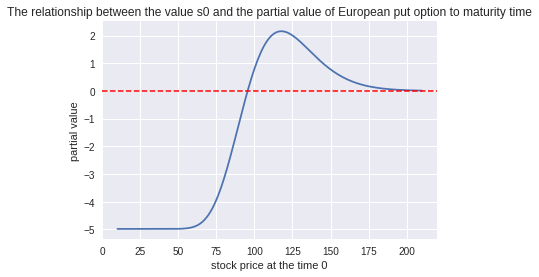

In [9]:
def p_t(s0):
  T = 1
  k = 110
  r = 0.0475
  sigma = 0.2
  d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  partial = s0 * ss.norm.pdf(d1) * sigma / 2 / np.sqrt(T) - r * k * np.exp(- r * T) * ss.norm.cdf(-d2)
  return partial

s0_list = range(10, 211)
#partial_list = []
#for s0 in s0_list:
  #partial_list.append(p_t(s0))
partial_list = [p_t(s0) for s0 in s0_list]
plt.plot(s0_list, partial_list)

#decorations
plt.xlabel('stock price at the time 0')
plt.ylabel('partial value')
plt.axhline(0, color='r', ls='dashed', lw=1.5, label='benchmark')
plt.title('The relationship between the value s0 and the partial value of European put option to maturity time');
plt.show()

In this problem, we know that $K = 110, S_0 = 100, \sigma = 0.2$ and $r = 0.0475$, then we can also see the diagram between the maturity time and the partial value of European put option.

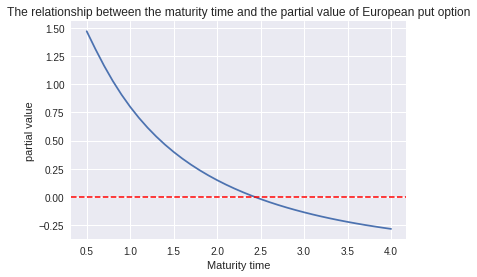

In [10]:
def p_t2(T):
  s0 = 100
  k = 110
  r = 0.0475
  sigma = 0.2
  d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  partial = s0 * ss.norm.pdf(d1) * sigma / 2 / np.sqrt(T) - r * k * np.exp(- r * T) * ss.norm.cdf(-d2)
  return partial

maturity_list = []
partial_list = []

for i in range(36):
  T = .5+i * 0.1
  maturity_list.append(T)
  partial_list.append(p_t2(T))
  
plt.plot(maturity_list, partial_list)

#decorations
plt.xlabel('Maturity time')
plt.ylabel('partial value')
plt.axhline(0, color='r', ls='dashed', lw=1.5, label='benchmark')
plt.title('The relationship between the maturity time and the partial value of European put option');
plt.show()


So when we expand the range of maturity time, the value of $\frac{\partial P_0}{\partial T}$ also maybe negative. But when maturity time $T \in [0.5, 2]$, the value of $\frac{\partial P_0}{\partial T}$ is positive.